# Introduction

New York City is a booming metropolis wherein iconic yellow cabs navigate through the street hustle and bustle by catering millions of rides per day. With their ubiquity in the city environment and serving such a crucial link in transport for citizens and travelers, any analysis of New York taxicabs must be truly eye-opening. I wanted to have some fun diving into this dataset to better understand how factors of trip distance, time of day, and passenger behavior affect fares and tips. More than the numbers themselves, this analysis provided a window into the rhythm and pulse of the city-one ride at a time. It's a chance to connect data with the real-world hustle of NYC, uncovering stories hidden in every fare.

In [22]:
import pandas as pd
import gdown

# The shared Google Drive link
file_url = "https://drive.google.com/uc?id=12NoLzy_SV55Ub5sn_EzirtOuyvizSw9X"

# Download the file using gdown
output_file = "data.csv"
gdown.download(file_url, output_file, quiet=False)

# Load the CSV into a pandas DataFrame
df = pd.read_csv(output_file)


Downloading...
From: https://drive.google.com/uc?id=12NoLzy_SV55Ub5sn_EzirtOuyvizSw9X
To: /content/data.csv
100%|██████████| 871k/871k [00:00<00:00, 39.1MB/s]


In [23]:
print(df.head())

   vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0          1  2018-03-27T12:47:16  2018-03-27T13:39:54                1   
1          1  2018-06-10T19:02:02  2018-06-10T19:31:53                1   
2          2  2018-10-23T20:35:45  2018-10-23T21:05:05                1   
3          1  2018-09-11T20:13:27  2018-09-11T20:36:56                1   
4          2  2018-06-20T22:20:22  2018-06-20T22:45:24                2   

   trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0           2.70          1                  N             1         29.0   
1          15.10          1                  N             1         42.0   
2           7.92          1                  N             1         26.0   
3           6.50          1                  N             1         22.5   
4           6.44          1                  N             1         24.5   

   extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
0    0.0  

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            10018 non-null  int64  
 1   pickup_datetime      10018 non-null  object 
 2   dropoff_datetime     10018 non-null  object 
 3   passenger_count      10018 non-null  int64  
 4   trip_distance        10018 non-null  float64
 5   rate_code            10018 non-null  int64  
 6   store_and_fwd_flag   10018 non-null  object 
 7   payment_type         10018 non-null  int64  
 8   fare_amount          10018 non-null  float64
 9   extra                10018 non-null  float64
 10  mta_tax              10018 non-null  float64
 11  tip_amount           10018 non-null  float64
 12  tolls_amount         10018 non-null  float64
 13  imp_surcharge        10018 non-null  float64
 14  total_amount         10018 non-null  float64
 15  pickup_location_id   10018 non-null 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# If not already, read the CSV into df. For example:
# df = pd.read_csv("data.csv")

# 1. Convert date/time columns to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], infer_datetime_format=True)
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], infer_datetime_format=True)

# 2. Check and handle missing values
print("Missing values per column:")
print(df.isnull().sum())

# If there are missing values in critical columns, decide on imputation strategy.
# For now, if minimal or no missing values:
# Example: If no major missing values found, we can move on. Otherwise:
# df = df.dropna()  # simple approach, but consider imputation if large missing data

# 3. Check and remove duplicates if any
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 4. Ensure correct data types
# store_and_fwd_flag is categorical (Y/N)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

# 5. Add derived features (e.g., trip duration in minutes)
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60.0

# Remove rows with non-positive trip durations or non-positive trip distances, if any
df = df[(df['trip_distance'] > 0) & (df['trip_duration'] > 0)]


<ipython-input-25-5aa44db64cc0>:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], infer_datetime_format=True)


Missing values per column:
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
dtype: int64
Number of duplicate rows: 0


<ipython-input-25-5aa44db64cc0>:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], infer_datetime_format=True)


<class 'pandas.core.frame.DataFrame'>
Index: 9939 entries, 0 to 10017
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   vendor_id            9939 non-null   int64         
 1   pickup_datetime      9939 non-null   datetime64[ns]
 2   dropoff_datetime     9939 non-null   datetime64[ns]
 3   passenger_count      9939 non-null   int64         
 4   trip_distance        9939 non-null   float64       
 5   rate_code            9939 non-null   int64         
 6   store_and_fwd_flag   9939 non-null   category      
 7   payment_type         9939 non-null   int64         
 8   fare_amount          9939 non-null   float64       
 9   extra                9939 non-null   float64       
 10  mta_tax              9939 non-null   float64       
 11  tip_amount           9939 non-null   float64       
 12  tolls_amount         9939 non-null   float64       
 13  imp_surcharge        9939 non-null   

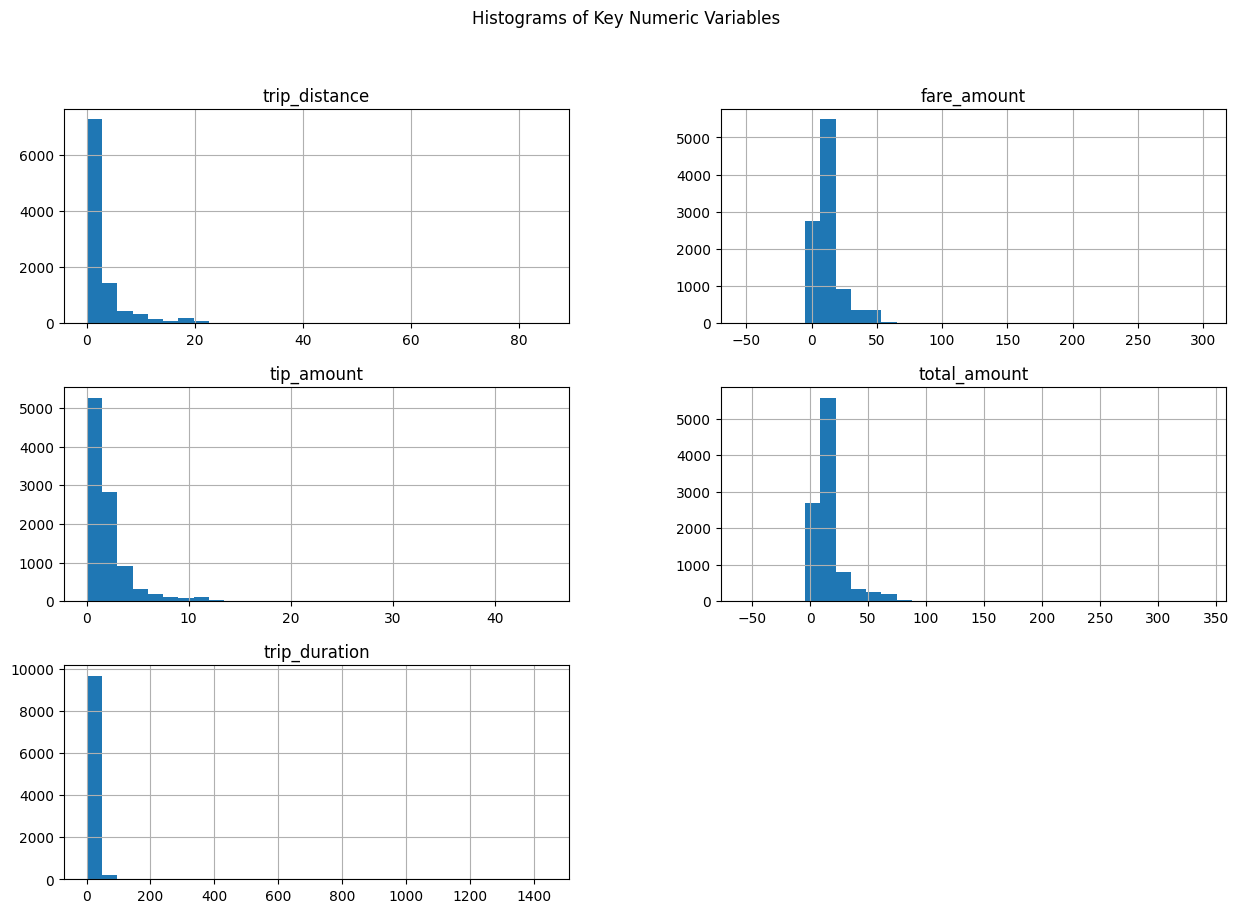

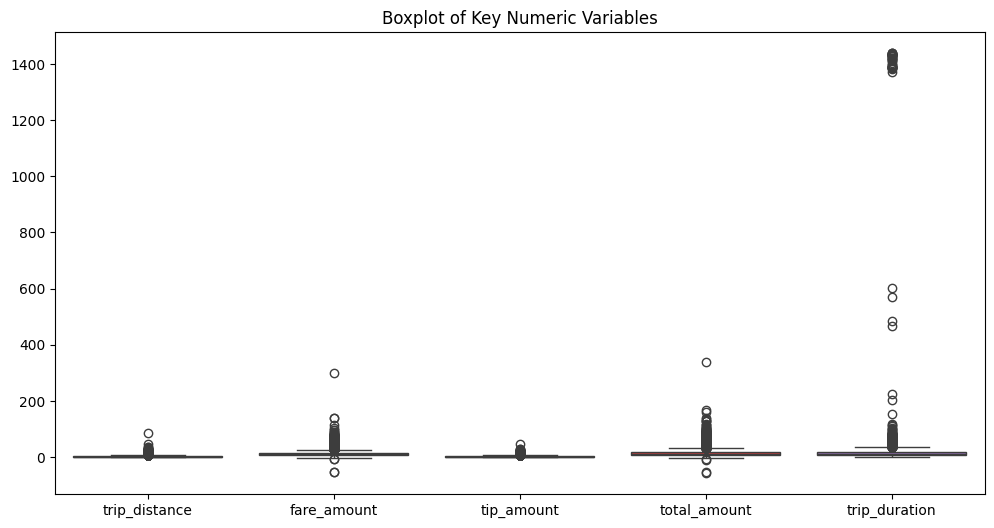

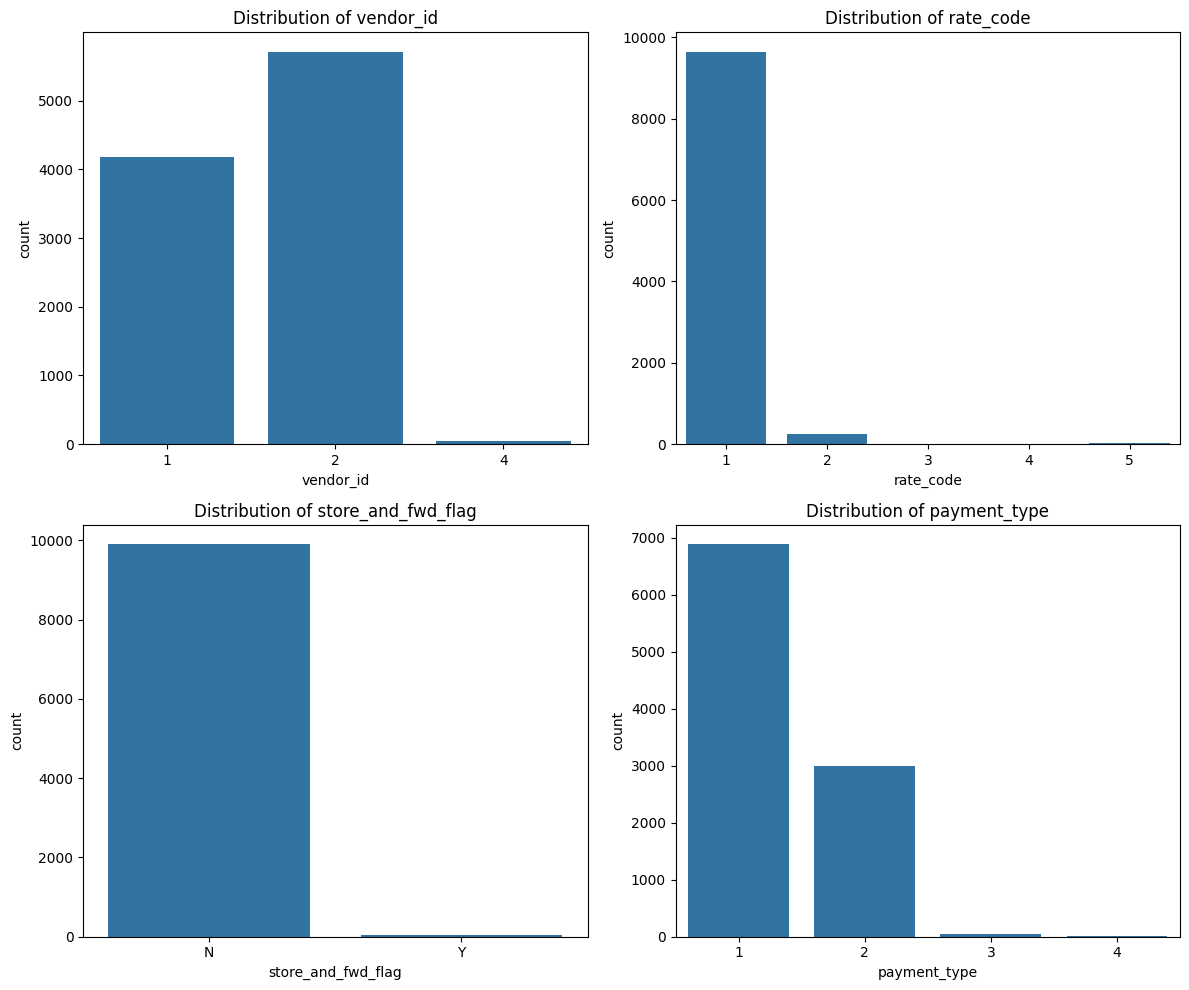

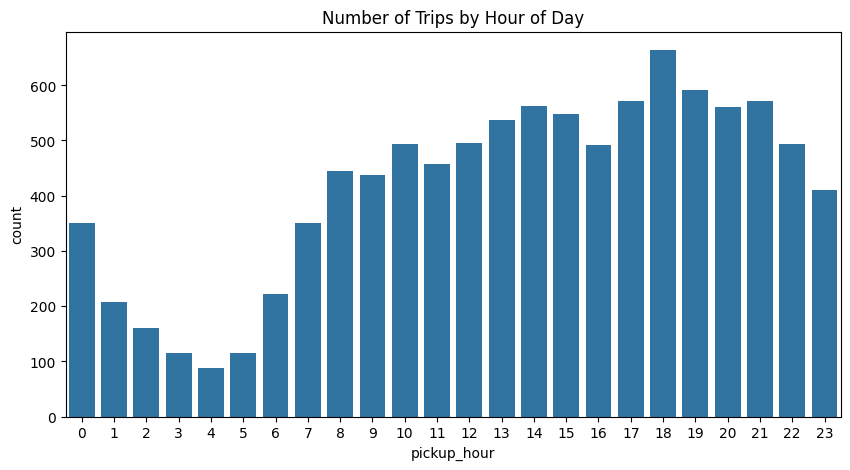

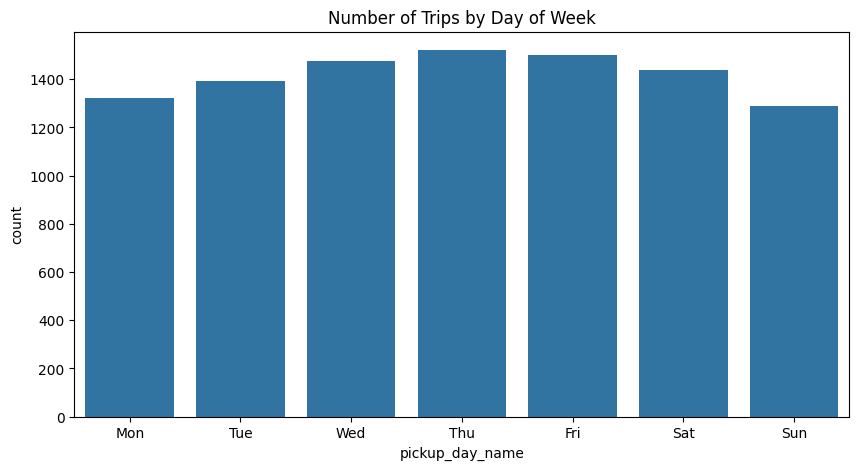

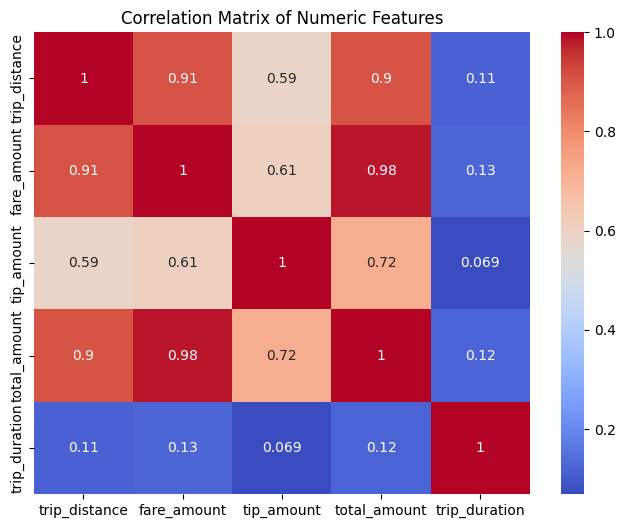

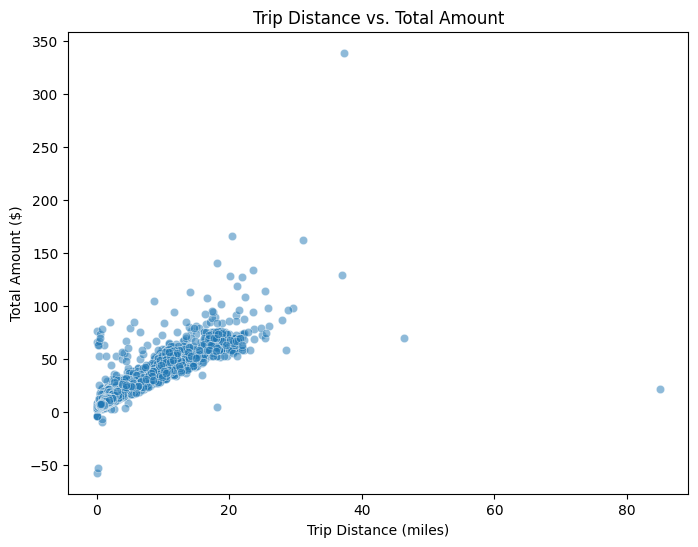

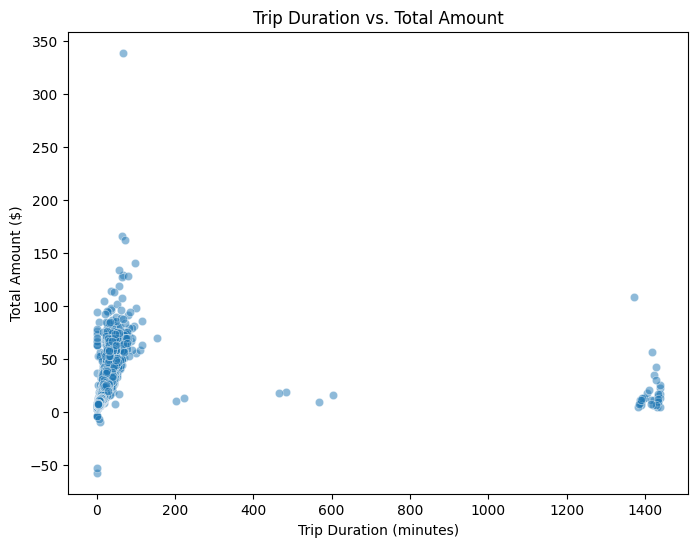

Vendor Comparison:
                 mean  median  count
vendor_id                          
1          16.077901   11.80   4182
2          16.643656   11.76   5711
4          12.727826   12.58     46


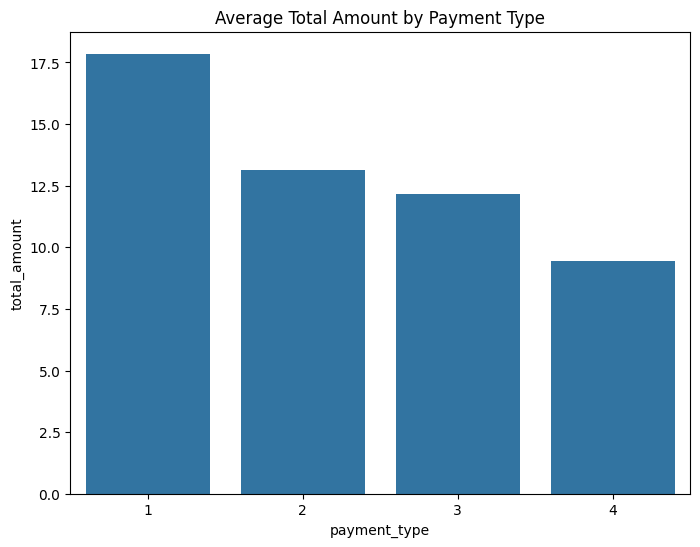

In [26]:
# Basic summary
print(df.info())
print(df.describe(include='all'))

# Distribution of numeric features
numeric_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']
df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Key Numeric Variables")
plt.show()

# Box plots to detect outliers in fare, distance, etc.
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Key Numeric Variables")
plt.show()

# Count plots for categorical variables
categorical_cols = ['vendor_id', 'rate_code', 'store_and_fwd_flag', 'payment_type']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()
for i, cat_col in enumerate(categorical_cols):
    sns.countplot(x=df[cat_col], ax=axs[i])
    axs[i].set_title(f"Distribution of {cat_col}")
plt.tight_layout()
plt.show()

# Time-based Analysis
# Extract hour, day of week, month from pickup_datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month

# Distribution of trips by hour
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_hour', data=df)
plt.title("Number of Trips by Hour of Day")
plt.show()

# If day names are desired:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['pickup_day_name'] = df['pickup_dayofweek'].map(day_map)

plt.figure(figsize=(10,5))
sns.countplot(x='pickup_day_name', data=df, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Number of Trips by Day of Week")
plt.show()

# Correlation matrix for numeric features
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Relationship between Fare and Distance
plt.figure(figsize=(8,6))
sns.scatterplot(x='trip_distance', y='total_amount', data=df, alpha=0.5)
plt.title("Trip Distance vs. Total Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Total Amount ($)")
plt.show()

# Relationship between Trip Duration and Fare
plt.figure(figsize=(8,6))
sns.scatterplot(x='trip_duration', y='total_amount', data=df, alpha=0.5)
plt.title("Trip Duration vs. Total Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Total Amount ($)")
plt.show()

# Vendor comparison
vendor_grouped = df.groupby('vendor_id')['total_amount'].agg(['mean','median','count'])
print("Vendor Comparison:\n", vendor_grouped)

# Payment type distribution in terms of total fare
payment_fare = df.groupby('payment_type')['total_amount'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='payment_type', y='total_amount', data=payment_fare)
plt.title("Average Total Amount by Payment Type")
plt.show()


# Findings from EDA

Trip Distance:

Most of the trips are of short distances, with heavy clustering towards the lower end (say, less than 5-10 miles). While there are some longer trips (tail of the distribution), these are infrequent.

Fare Amount:

Fares have a higher concentration of small values (less than $50), and few trips go for extremely higher amounts.
There might be some anomalies or unusual negative values, such as refunds or data errors.

Tip Amount:

Tips tend to be small, bunched near zero, and tail off precipitously. This may indicate that a tip is not required or many customers do not leave a tip.

Total Amount:

The distribution of the total amount is similar to that of the fare amount but slightly wider because of surcharges, tips, and tolls added to it.
Again, negative or unusually high values may indicate data anomalies or outliers.

Trip Duration:

Most trips are relatively short, likely under 30 minutes.
A few trips have considerably longer lengths-the ones that may reflect traffic delays, longer rides, or problems with the data recording.
It is very probable that these highly high values show us the outliers that we had flagged.

# Key Observations:

Key Observations:

Skewness: All distributions are right-skewed; that is, most data point in the smaller values with the tail toward larger values.

Outliers: The following columns contain some extreme values: trip_distance, fare_amount, total_amount, and trip_duration. Further investigation into the relevance of these is called for-for example, whether they reflect real data or errors.

Negative Values: Most likely, negative values are an error in fare_amount and total_amount, and will need to be filtered out or imputed.

# Understanding the Outliers in Trip Duration

       vendor_id                pickup_datetime  \
count       40.0                             40   
mean         2.0  2018-07-06 11:39:32.125000192   
min          2.0            2018-01-03 18:45:29   
25%          2.0     2018-03-25 04:41:38.500000   
50%          2.0     2018-06-25 07:04:43.500000   
75%          2.0  2018-10-30 06:56:02.249999872   
max          2.0            2018-12-19 21:39:47   
std          0.0                            NaN   

                    dropoff_datetime  passenger_count  trip_distance  \
count                             40        40.000000      40.000000   
mean   2018-07-07 08:44:49.624999936         1.950000       3.125000   
min              2018-01-04 18:39:24         1.000000       0.220000   
25%    2018-03-26 04:02:19.750000128         1.000000       1.227500   
50%       2018-06-25 22:51:54.500000         1.000000       1.585000   
75%       2018-10-31 06:02:04.500000         2.000000       3.265000   
max              2018-12-20 21:33:03

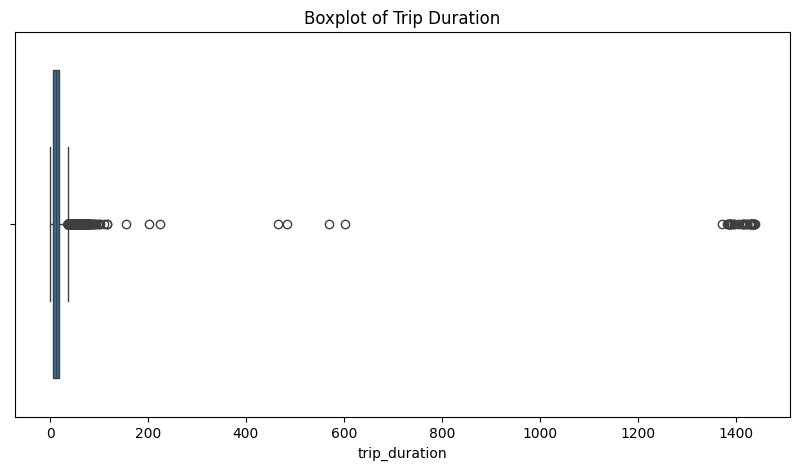

In [27]:
# Identify trip durations beyond a reasonable range (e.g., above 3 hours)
extreme_trips = df[df['trip_duration'] > 180]  # Duration in minutes
print(extreme_trips.describe())

# Check the distribution of outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['trip_duration'])
plt.title("Boxplot of Trip Duration")
plt.show()


In [28]:
# Compare stats with and without outliers
print("With Outliers:")
print(df['trip_duration'].describe())

# Define a threshold for outliers (e.g., trips longer than 3 hours)
threshold = 180  # in minutes
df_filtered = df[df['trip_duration'] <= threshold]

print("\nWithout Outliers:")
print(df_filtered['trip_duration'].describe())


With Outliers:
count    9939.000000
mean       19.421991
std        83.233903
min         0.050000
25%         6.633333
50%        11.183333
75%        18.433333
max      1438.966667
Name: trip_duration, dtype: float64

Without Outliers:
count    9899.000000
mean       14.387665
std        11.722185
min         0.050000
25%         6.616667
50%        11.166667
75%        18.333333
max       154.366667
Name: trip_duration, dtype: float64


# Separating Outliers in trip duration for a later analysis

In [29]:
# Flagging outliers
threshold = 180  # Threshold in minutes for trip duration
df['is_outlier'] = df['trip_duration'] > threshold

# Create two separate DataFrames
typical_trips = df[df['is_outlier'] == False].copy()
outlier_trips = df[df['is_outlier'] == True].copy()

# Confirm the separation
print(f"Number of typical trips: {len(typical_trips)}")
print(f"Number of outlier trips: {len(outlier_trips)}")



Number of typical trips: 9899
Number of outlier trips: 40


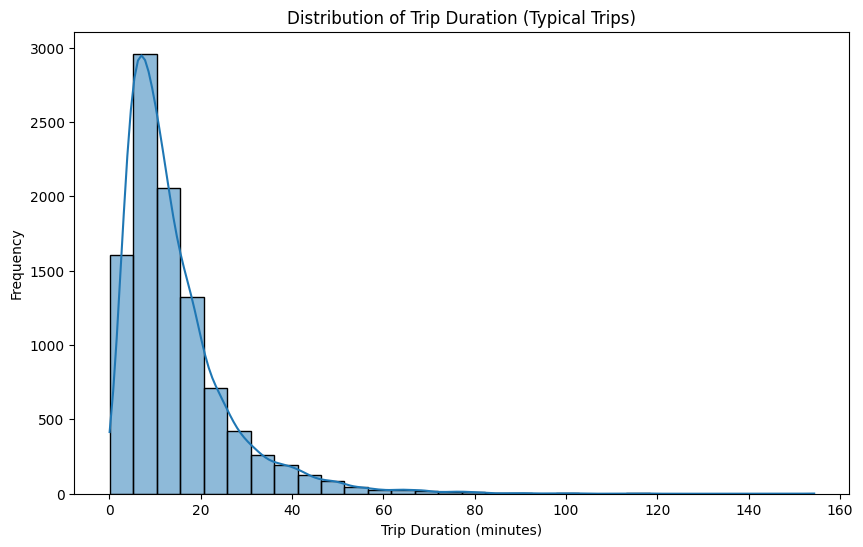

In [30]:
# Example: Distribution of trip durations for typical trips
plt.figure(figsize=(10, 6))
sns.histplot(typical_trips['trip_duration'], bins=30, kde=True)
plt.title("Distribution of Trip Duration (Typical Trips)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


# Understanding the Outliers in Trip Distance


In [31]:
# Calculate IQR for trip_distance
Q1 = typical_trips['trip_distance'].quantile(0.25)
Q3 = typical_trips['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flagging outliers
typical_trips['is_distance_outlier'] = (typical_trips['trip_distance'] < lower_bound) | (typical_trips['trip_distance'] > upper_bound)

# Create separate DataFrames
distance_outliers = typical_trips[typical_trips['is_distance_outlier']].copy()
typical_trips_cleaned = typical_trips[~typical_trips['is_distance_outlier']].copy()

# Confirm separation
print(f"Number of typical trips: {len(typical_trips_cleaned)}")
print(f"Number of distance outliers: {len(distance_outliers)}")


Number of typical trips: 8740
Number of distance outliers: 1159


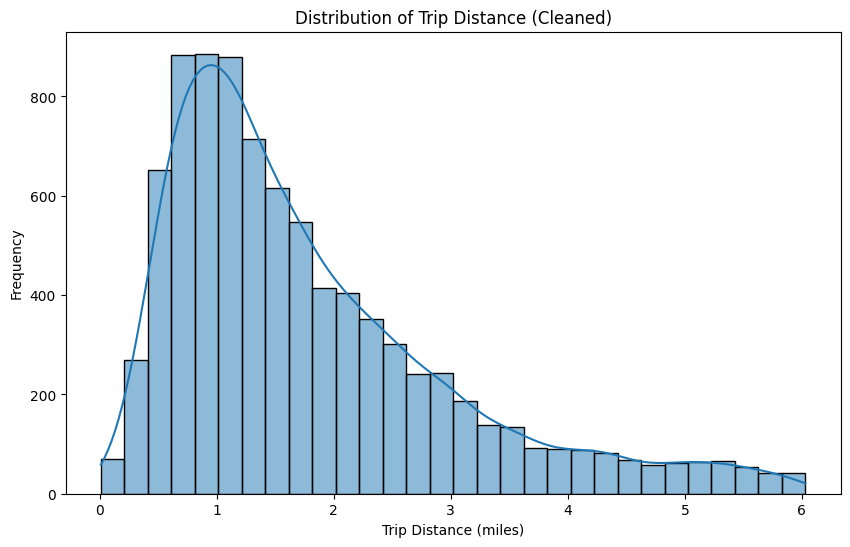

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cleaned trip distance
plt.figure(figsize=(10, 6))
sns.histplot(typical_trips_cleaned['trip_distance'], bins=30, kde=True)
plt.title("Distribution of Trip Distance (Cleaned)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()


# Saving Outliers for a separate Analysis

In [33]:
# Save outliers to a separate file or keep for further analysis
distance_outliers.to_csv("trip_distance_outliers.csv", index=False)


# Working with Typical Trips

# 1. Relationship Between trip_distance and fare_amount

Are fares linearly related to distance?

Are there clusters indicating fixed fares?

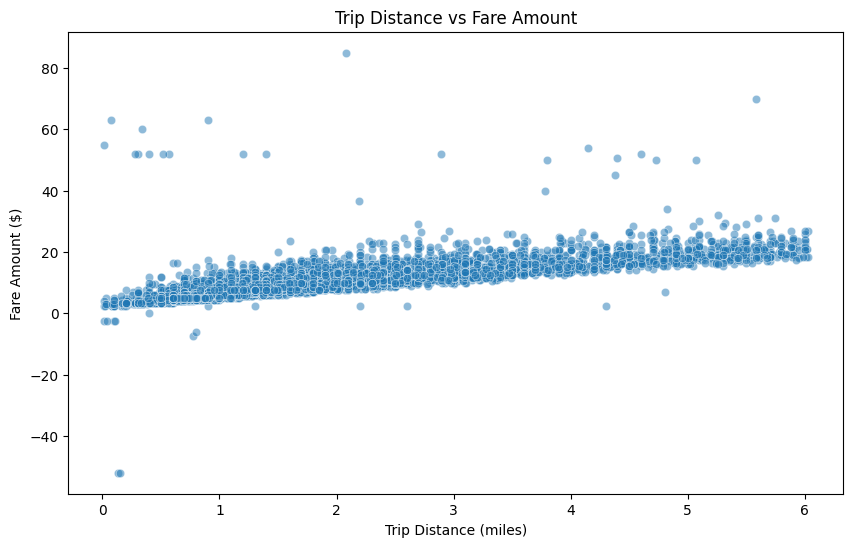

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=typical_trips_cleaned, alpha=0.5)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()


**Observation**:

1. Trip Distance vs Fare Amount (Scatter Plot)

Positive Correlation: The scatter plot shows a positive correlation between trip_distance and fare_amount. Longer trips tend to have higher fares, which is expected.

Clustered Short Trips: A large number of trips have distances less than 2 miles and fares less than $20. These likely represent short city commutes.

Anomalies: A few points show negative fare amounts, which might be data errors or could be the case of refunds/adjustments.

# 2. Relationship Between trip_distance and tip_amount

Are longer trips more likely to have higher tips?

Are tips mostly absent for shorter trips?

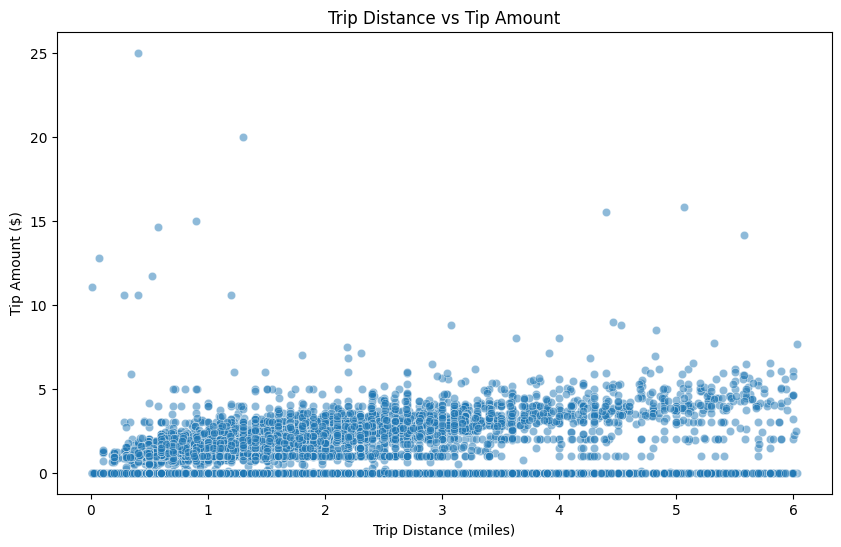

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=typical_trips_cleaned, alpha=0.5)
plt.title("Trip Distance vs Tip Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()


**Observations:**

Weak Correlation: Tips do not increase with distance in a consistent manner. Longer trips may have higher tips, but the variation is wide.

Small Tips for Most Trips: Most trips have tips clustered around $0–$5, regardless of distance.

Few Generous Tips: A small number of trips have tips above $10, which could be influenced by some customer behavior or good service quality.

# 3. Number of Trips by Hour of Day (Bar Chart)

Check if trip frequency varies by time of day.

<ipython-input-36-416405b77057>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=typical_trips_cleaned, palette="viridis")


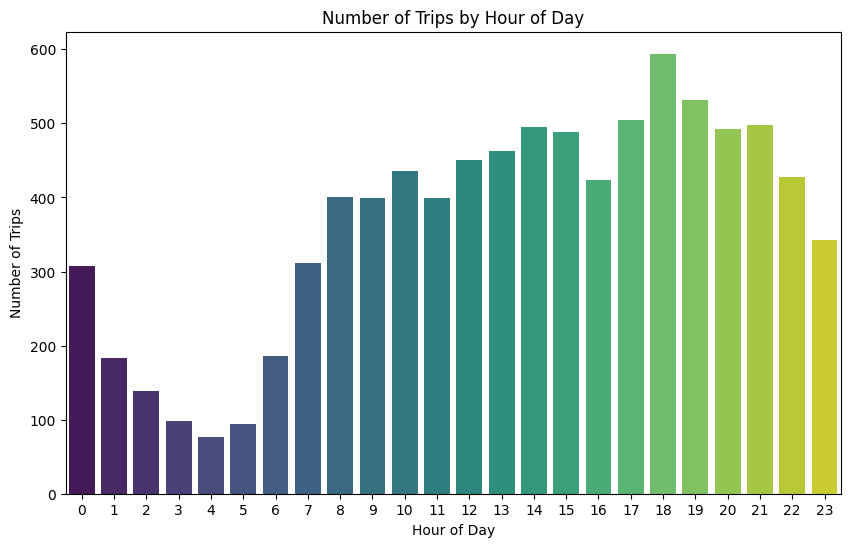

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=typical_trips_cleaned, palette="viridis")
plt.title("Number of Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()


**Observations:**

Peak Hours: Trip frequency increases from 6 AM, reaches its peak at 5–7 PM, and reflects typical rush hours for commuters.

Nighttime Slumber: The graph shows that the number of trips between midnight and 5 AM drastically decreases because of low activities.

# 4. Number of Trips by Day of the Week (Bar Chart)

Is there a higher volume of trips on weekends or weekdays?

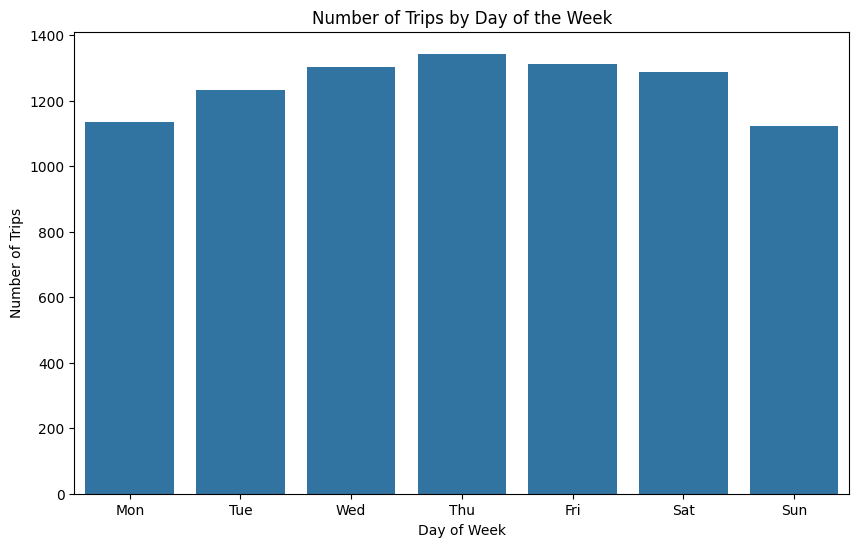

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day_name', data=typical_trips_cleaned, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("Number of Trips by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()


**Observations:**

Consistent Weekday Demand: Trip frequency is relatively consistent Monday through Saturday, with Thursday being slightly busier.

Sunday Drop: A significant decline in the number of trips on Sunday could indicate reduced activity, probably fewer work-related trips.

# 5. Average Fare by Payment Type (Bar Chart)

Are cash payments typically for smaller fares?

Do card payments dominate high-value transactions?

<ipython-input-38-7a27827bc5ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='fare_amount', data=payment_means, palette="coolwarm")


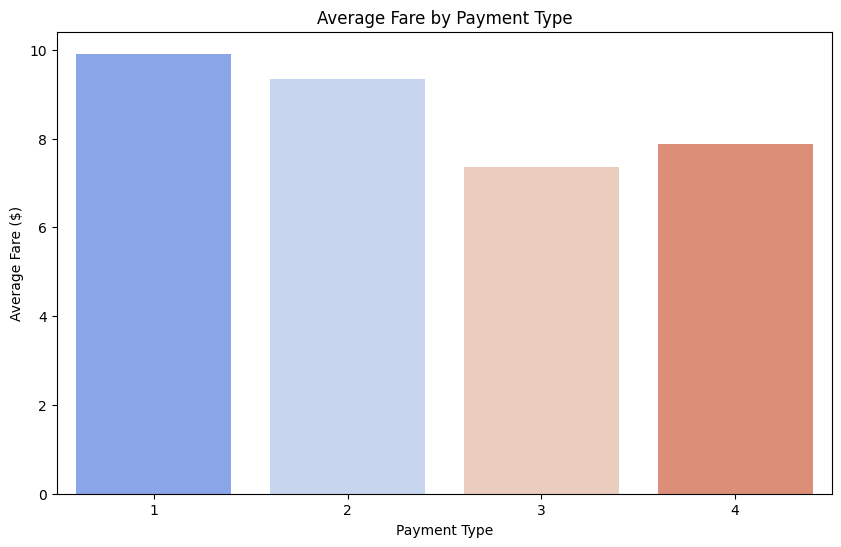

In [38]:
payment_means = typical_trips_cleaned.groupby('payment_type')['fare_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='fare_amount', data=payment_means, palette="coolwarm")
plt.title("Average Fare by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Average Fare ($)")
plt.show()


Highest for Payment Type 1 (Credit Card): Trips paid by credit card have the highest average fare, suggesting it's preferred for longer or higher-value trips.

Lower Fares for Other Payment Types: Disputed payments (type 3) and other methods (type 4) have lower average fares, likely indicating shorter trips.

# 6. Number of Trips by Vendor (Bar Chart)

Does one vendor handle significantly more trips?

Do vendors differ in average fare?

<ipython-input-39-c8203fd7cab2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vendor_id', y='count', data=vendor_stats, palette="Blues", alpha=0.7)


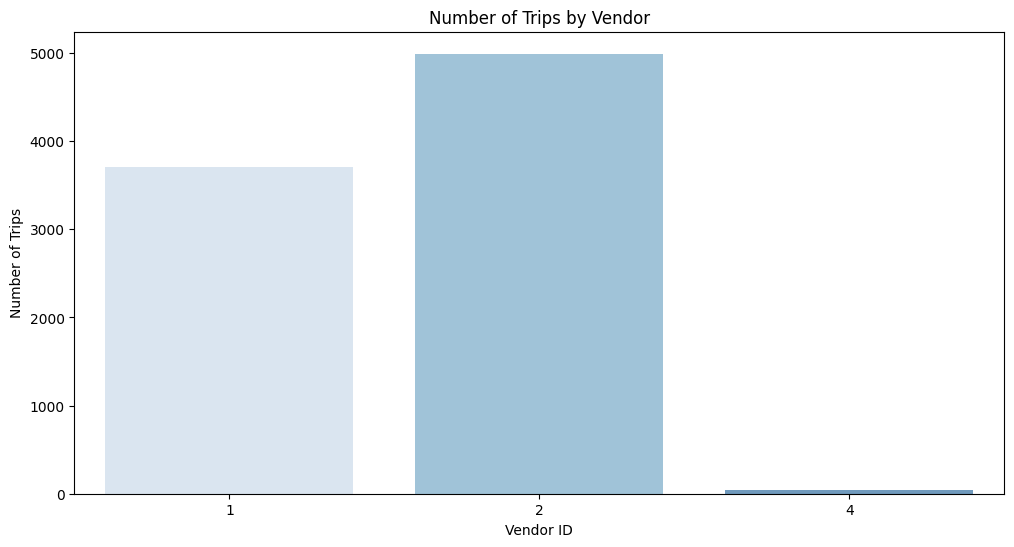

<ipython-input-39-c8203fd7cab2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vendor_id', y='mean', data=vendor_stats, palette="Greens", alpha=0.7)


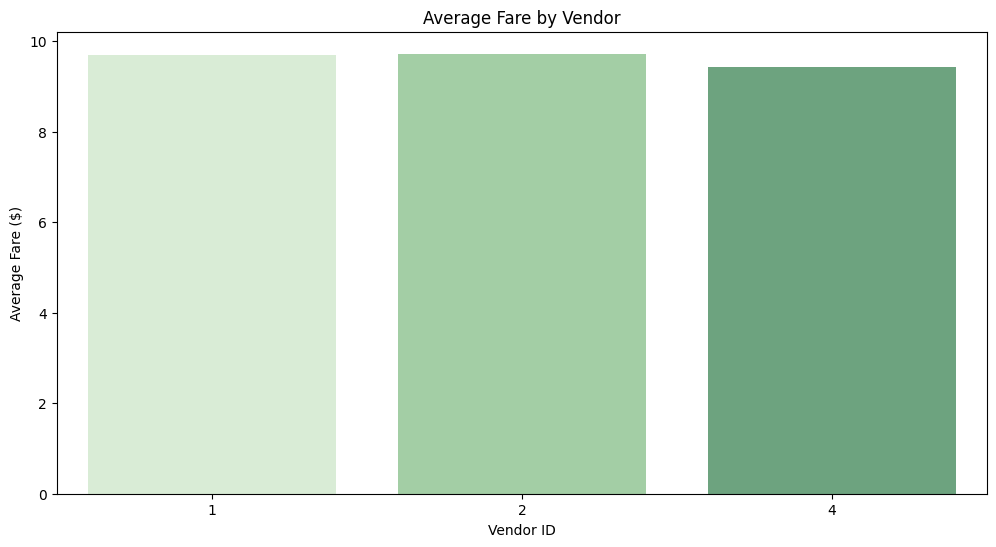

In [39]:
vendor_stats = typical_trips_cleaned.groupby('vendor_id')['fare_amount'].agg(['count', 'mean']).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='vendor_id', y='count', data=vendor_stats, palette="Blues", alpha=0.7)
plt.title("Number of Trips by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Number of Trips")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='vendor_id', y='mean', data=vendor_stats, palette="Greens", alpha=0.7)
plt.title("Average Fare by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare ($)")
plt.show()


**Observations:**

Vendor 2 Dominates: Vendor 2 does significantly more trips compared to Vendor 1, which would suggest a larger market share or better availability.

Minimum Activity for Vendor 4: This vendor has virtually no rides, which would indicate inactivity or the use in very specific cases.

Similar Averages: Vendors 1, 2, and 4 have similar average fares, suggesting uniform pricing across vendors.

# Correlation Matrix

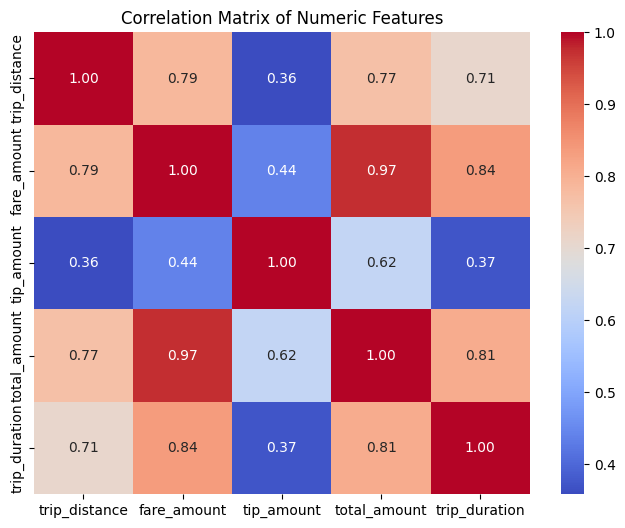

In [40]:
corr_matrix = typical_trips_cleaned[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


**Observations:**

Strong Correlations:

trip_distance and fare_amount (0.79): Fare strongly depends on distance.

fare_amount and total_amount (0.97): Total fare is almost entirely driven by the base fare.

trip_duration and fare_amount (0.84): Longer durations correlate with higher fares.

Weak Correlations:

trip_distance and tip_amount (0.36): Distance has limited influence on tips.

trip_duration and tip_amount (0.37): Longer durations don’t consistently result in higher tips.

**Strikingly important note to make:**

I was able to observe more correlation between trip_distance and fare_amount when considering data that only pertained to typical rides after cleaning the dataset.

# Identifying and reducing anamolies

In [41]:
# 1. Negative or zero values in fare_amount and total_amount
anomalous_fares = typical_trips_cleaned[(typical_trips_cleaned['fare_amount'] <= 0) |
                                        (typical_trips_cleaned['total_amount'] <= 0)]
print(f"Anomalous fare/total records: {len(anomalous_fares)}")

# 2. Zero or extreme values in trip_distance
anomalous_distances = typical_trips_cleaned[(typical_trips_cleaned['trip_distance'] <= 0)]
print(f"Anomalous trip distances: {len(anomalous_distances)}")

# 3. Negative or zero trip durations
anomalous_durations = typical_trips_cleaned[(typical_trips_cleaned['trip_duration'] <= 0)]
print(f"Anomalous trip durations: {len(anomalous_durations)}")

# 4. Unexpected payment_type codes
valid_payment_types = [1, 2, 3, 4, 5, 6]
anomalous_payment_types = typical_trips_cleaned[~typical_trips_cleaned['payment_type'].isin(valid_payment_types)]
print(f"Anomalous payment types: {len(anomalous_payment_types)}")

# 5. Invalid store_and_fwd_flag values
anomalous_flags = typical_trips_cleaned[~typical_trips_cleaned['store_and_fwd_flag'].isin(['Y', 'N'])]
print(f"Anomalous store_and_fwd_flag values: {len(anomalous_flags)}")


Anomalous fare/total records: 9
Anomalous trip distances: 0
Anomalous trip durations: 0
Anomalous payment types: 0
Anomalous store_and_fwd_flag values: 0


In [42]:
typical_trips_cleaned = typical_trips_cleaned[(typical_trips_cleaned['fare_amount'] > 0) &
                                              (typical_trips_cleaned['total_amount'] > 0) &
                                              (typical_trips_cleaned['trip_distance'] > 0) &
                                              (typical_trips_cleaned['trip_duration'] > 0)]


In [43]:
typical_trips_cleaned['invalid_payment_type'] = ~typical_trips_cleaned['payment_type'].isin(valid_payment_types)
typical_trips_cleaned['invalid_flag'] = ~typical_trips_cleaned['store_and_fwd_flag'].isin(['Y', 'N'])


array([[<Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'trip_duration'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

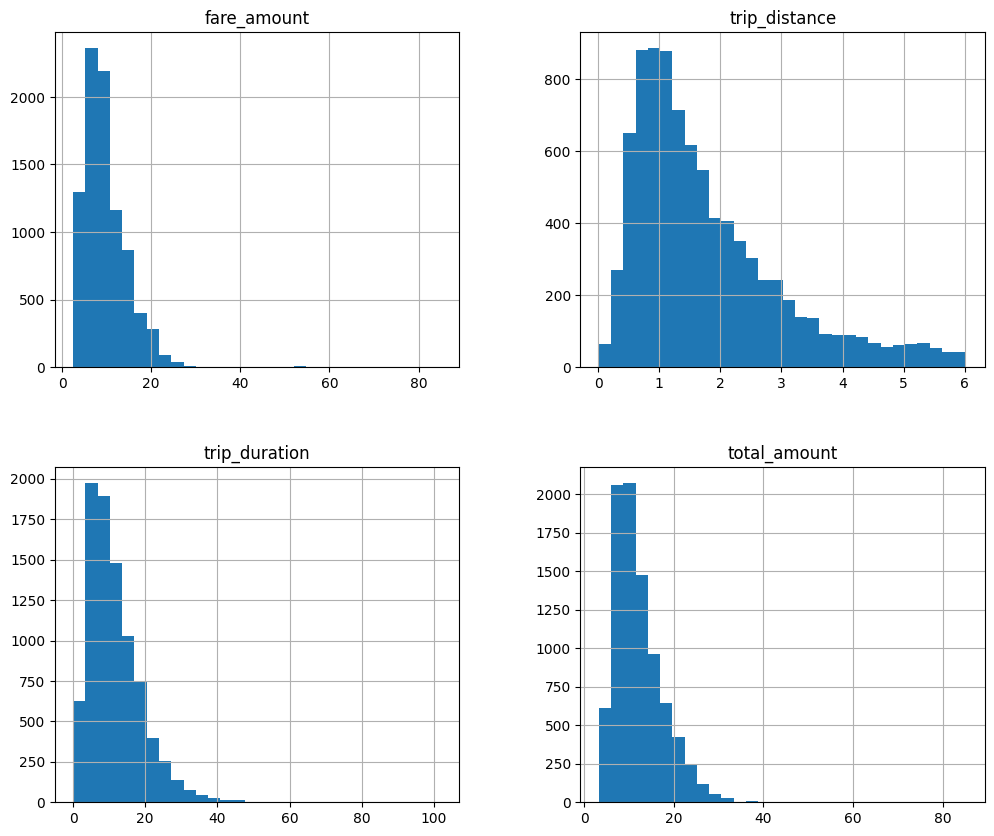

In [44]:
# Re-check distributions of key columns
typical_trips_cleaned[['fare_amount', 'trip_distance', 'trip_duration', 'total_amount']].describe()

# Plot histograms for visual verification
typical_trips_cleaned[['fare_amount', 'trip_distance', 'trip_duration', 'total_amount']].hist(bins=30, figsize=(12, 10))


In [45]:
typical_trips_cleaned.to_csv("cleaned_typical_trips.csv", index=False)


# Finding Temporal trends.

Trip distribution across hours, days, and months.

Variations in metrics like average fare, trip distance, and tip amount by time.

<ipython-input-46-c5835685481e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=typical_trips_cleaned, palette="viridis")


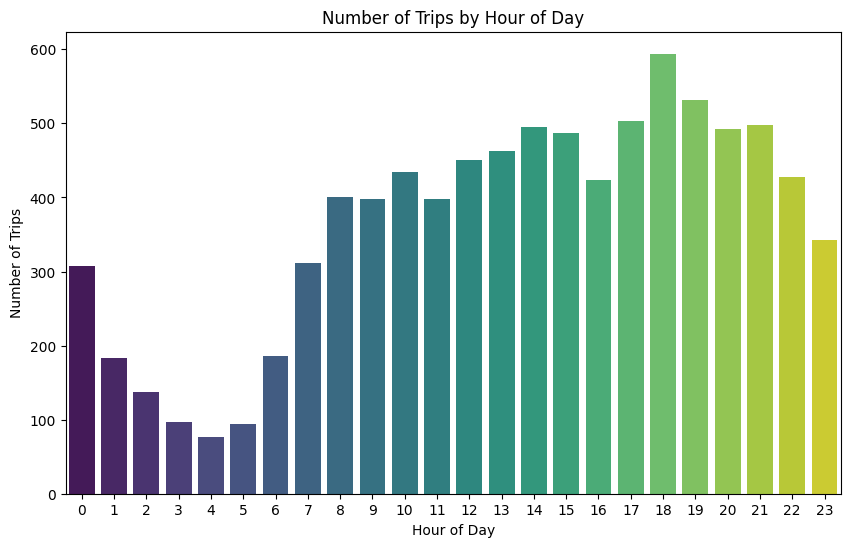

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of trips by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=typical_trips_cleaned, palette="viridis")
plt.title("Number of Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()


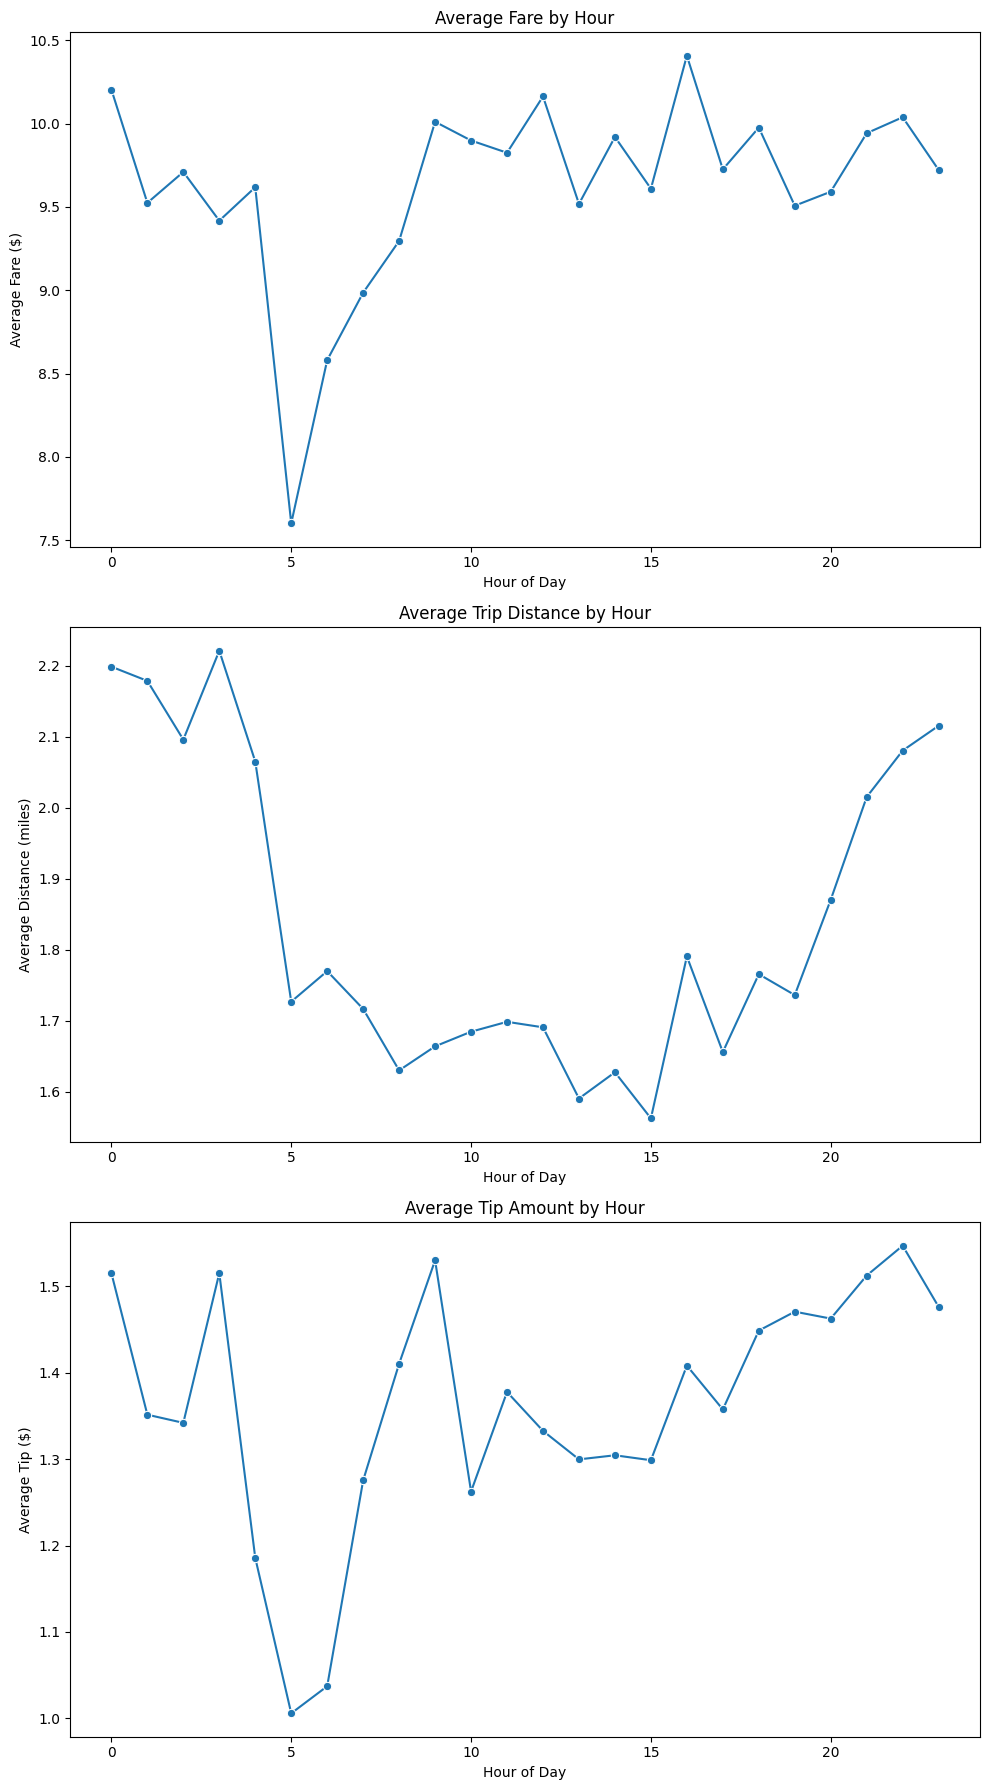

In [47]:
# Group by hour
hourly_trends = typical_trips_cleaned.groupby('pickup_hour').agg({
    'fare_amount': 'mean',
    'trip_distance': 'mean',
    'tip_amount': 'mean'
}).reset_index()

# Plot average metrics
fig, ax = plt.subplots(3, 1, figsize=(10, 18))
sns.lineplot(x='pickup_hour', y='fare_amount', data=hourly_trends, ax=ax[0], marker='o')
ax[0].set_title("Average Fare by Hour")
ax[0].set_xlabel("Hour of Day")
ax[0].set_ylabel("Average Fare ($)")

sns.lineplot(x='pickup_hour', y='trip_distance', data=hourly_trends, ax=ax[1], marker='o')
ax[1].set_title("Average Trip Distance by Hour")
ax[1].set_xlabel("Hour of Day")
ax[1].set_ylabel("Average Distance (miles)")

sns.lineplot(x='pickup_hour', y='tip_amount', data=hourly_trends, ax=ax[2], marker='o')
ax[2].set_title("Average Tip Amount by Hour")
ax[2].set_xlabel("Hour of Day")
ax[2].set_ylabel("Average Tip ($)")

plt.tight_layout()
plt.show()


**Observations:**

1. Average Fare by Hour:

  Peak Periods: During late night and early morning, the average fare remains at a high price range between midnight and 3 AM. This may be explained by the higher demand for taxis, possibly due to airport trips or nightlife.

  Early Morning Dip: Fares tend to dip noticeably between 4-6 AM, signaling fewer long or premium trips during this time.

  Midday Stability: The average fare increases after 6 AM and stays stable throughout the day, likely reflecting a balance of short and long trips during business hours.


2. Average Trip Distance by Hour:

  Nighttime Long Trips: The average distance traveled is higher from midnight up to around 2 AM; that suggests longer trips such as airport transfers or even trips out of the city.

  Morning Dip: The average trip distance drops significantly during the early morning hours of 4-7 AM, possibly due to shorter commutes or reduced activity.

  Evening Rise: The average distance of the trip started to rise gradually after 6 PM and increases until late at night; this corresponds to longer home-to-work evening commutes or nighttime leisure trips.

3. Average Tip Amount by Hour:

  Generous Late Night Tips: The average tips are maximum during late-night service hours - between 12 and 2 AM, which is possibly due to social or leisure trips related to these hours.

  Morning Low: Tips are lowest in the early morning hours-4 to 6 AM-and may be related to utilitarian trips where lower or no tipping is expected.

  Steady Growth: Tip amounts steadily increase throughout the day, peaking in the evening hours of 8-10 PM, perhaps reflecting customer satisfaction with service during busy times.

**General Observations Across All Three Trends:**

Temporal Dynamics:

    The late night from 12-3 AM presents longer distances and higher tips and fares, which could be influenced by specific travel needs in the city during these hours.
    The early morning period, from 4-6 AM, shows the shortest trip lengths, the lowest fares, and low tips, thus matching the least activity in the city.

Daytime Stability:

    From 9 AM to 6 PM, all metrics remain reasonably constant and reflect typical commutes and business-related travel within the city.

Evening Activity:

    After 6 PM, the trip distance, fare, and tip amount rise again, likely due to both commuters and leisure travelers.


<ipython-input-48-2413d647ddcb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_day_name', y='fare_amount', data=daily_trends, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette="coolwarm")


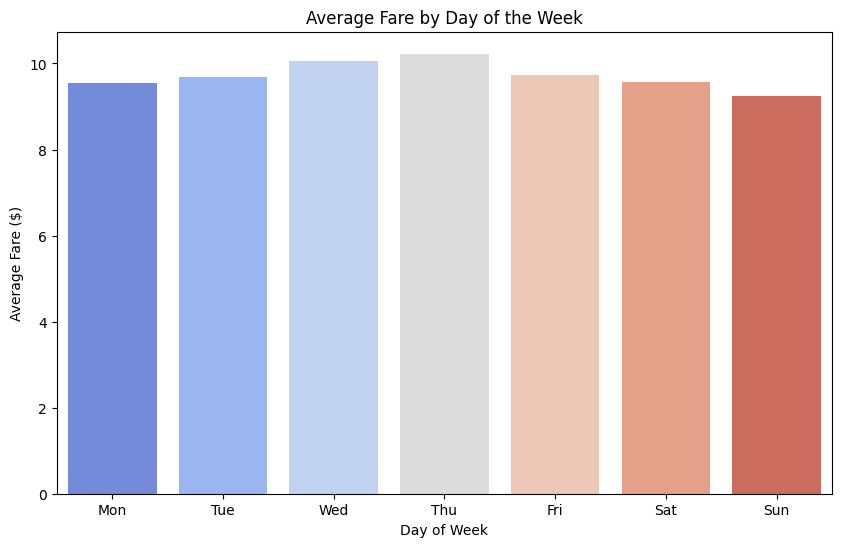

In [48]:
# Average fare by day
daily_trends = typical_trips_cleaned.groupby('pickup_day_name')['fare_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_day_name', y='fare_amount', data=daily_trends, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette="coolwarm")
plt.title("Average Fare by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Fare ($)")
plt.show()


# Vendor Analysis

<ipython-input-49-38c21b1b528f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendor_trip_counts.index, y=vendor_trip_counts.values, palette="Blues")


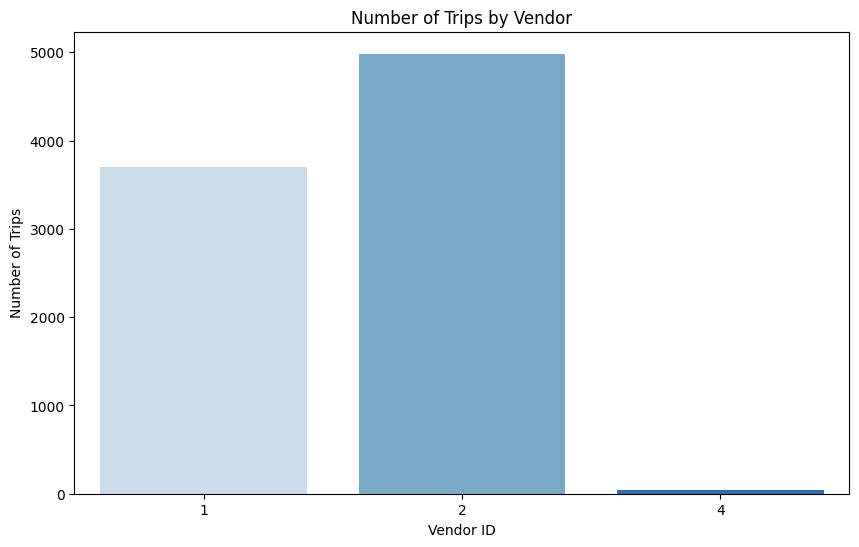

In [49]:
# Number of trips by vendor
vendor_trip_counts = typical_trips_cleaned['vendor_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=vendor_trip_counts.index, y=vendor_trip_counts.values, palette="Blues")
plt.title("Number of Trips by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Number of Trips")
plt.show()


<ipython-input-50-5814b838b779>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vendor_id', y='fare_amount', data=vendor_stats, ax=ax[0], palette="coolwarm")
<ipython-input-50-5814b838b779>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vendor_id', y='trip_distance', data=vendor_stats, ax=ax[1], palette="coolwarm")
<ipython-input-50-5814b838b779>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vendor_id', y='trip_duration', data=vendor_stats, ax=ax[2], palette="coolwarm")


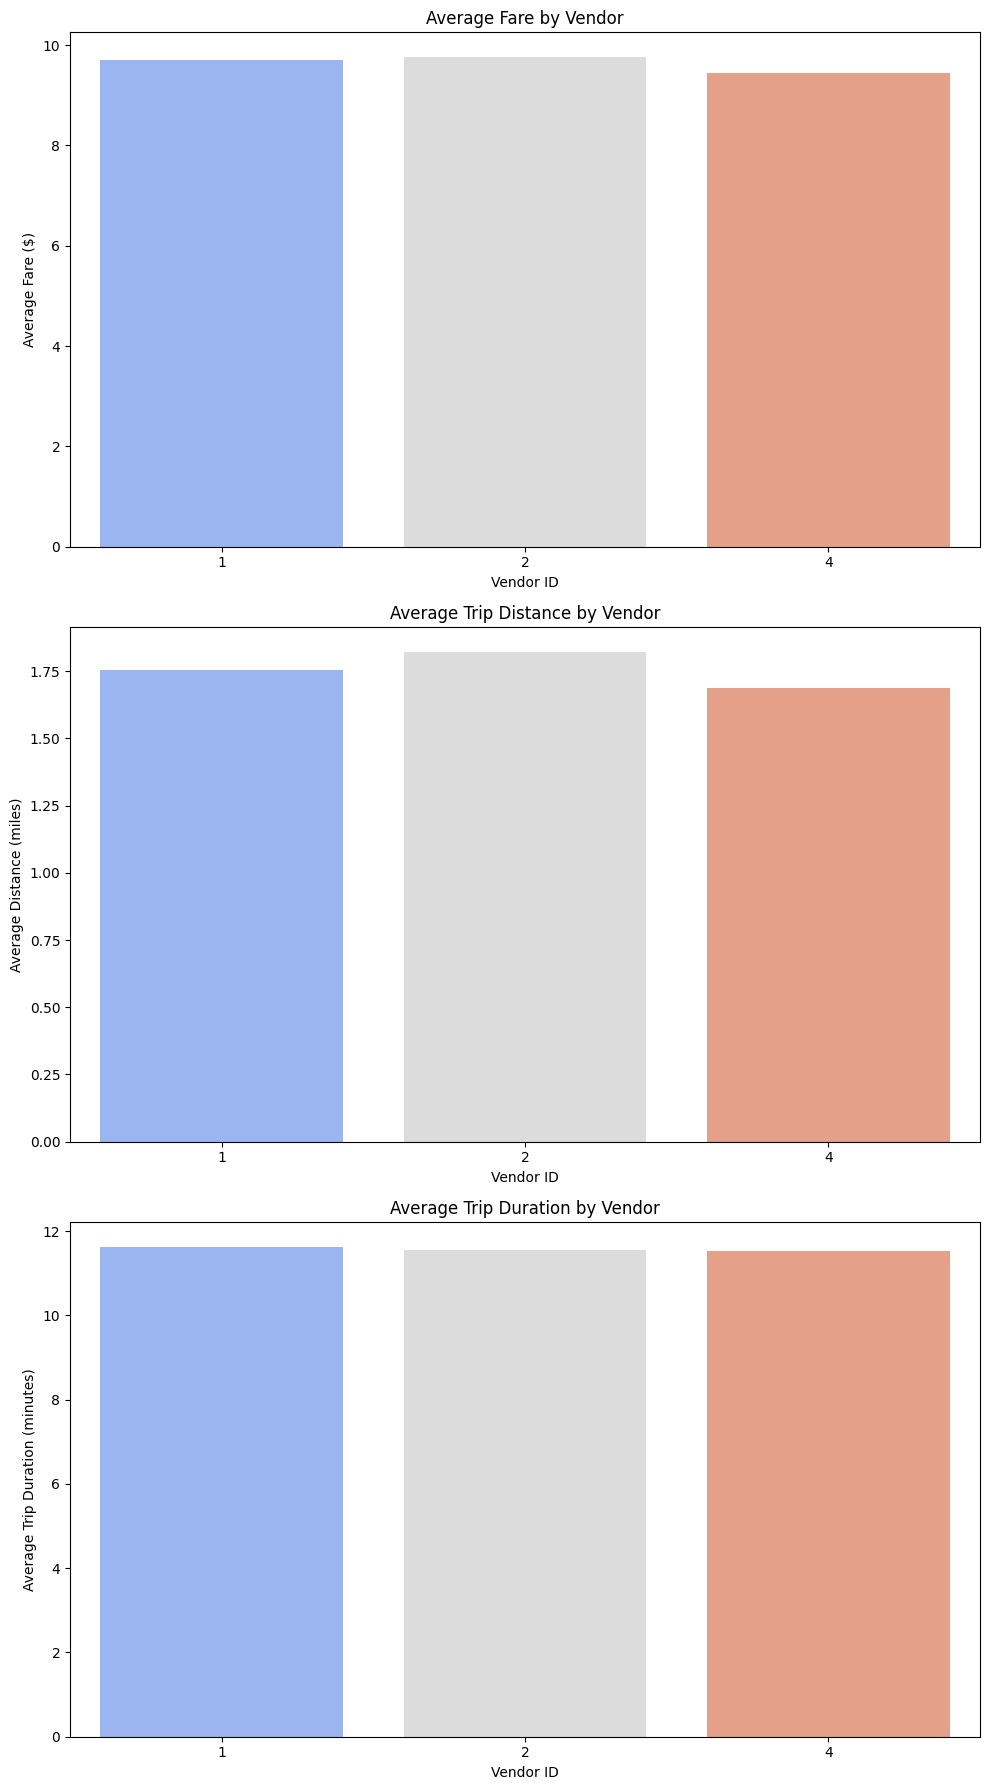

In [50]:
# Group by vendor
vendor_stats = typical_trips_cleaned.groupby('vendor_id').agg({
    'fare_amount': 'mean',
    'trip_distance': 'mean',
    'trip_duration': 'mean'
}).reset_index()

# Plot average metrics by vendor
fig, ax = plt.subplots(3, 1, figsize=(10, 18))
sns.barplot(x='vendor_id', y='fare_amount', data=vendor_stats, ax=ax[0], palette="coolwarm")
ax[0].set_title("Average Fare by Vendor")
ax[0].set_xlabel("Vendor ID")
ax[0].set_ylabel("Average Fare ($)")

sns.barplot(x='vendor_id', y='trip_distance', data=vendor_stats, ax=ax[1], palette="coolwarm")
ax[1].set_title("Average Trip Distance by Vendor")
ax[1].set_xlabel("Vendor ID")
ax[1].set_ylabel("Average Distance (miles)")

sns.barplot(x='vendor_id', y='trip_duration', data=vendor_stats, ax=ax[2], palette="coolwarm")
ax[2].set_title("Average Trip Duration by Vendor")
ax[2].set_xlabel("Vendor ID")
ax[2].set_ylabel("Average Trip Duration (minutes)")

plt.tight_layout()
plt.show()


**No significant differences found in Vendor Analysis**

# 1. Vendor Performance by Temporal Trends

Which vendor dominates during certain hours?

Do vendors have similar average fares throughout the day, or are there significant differences?

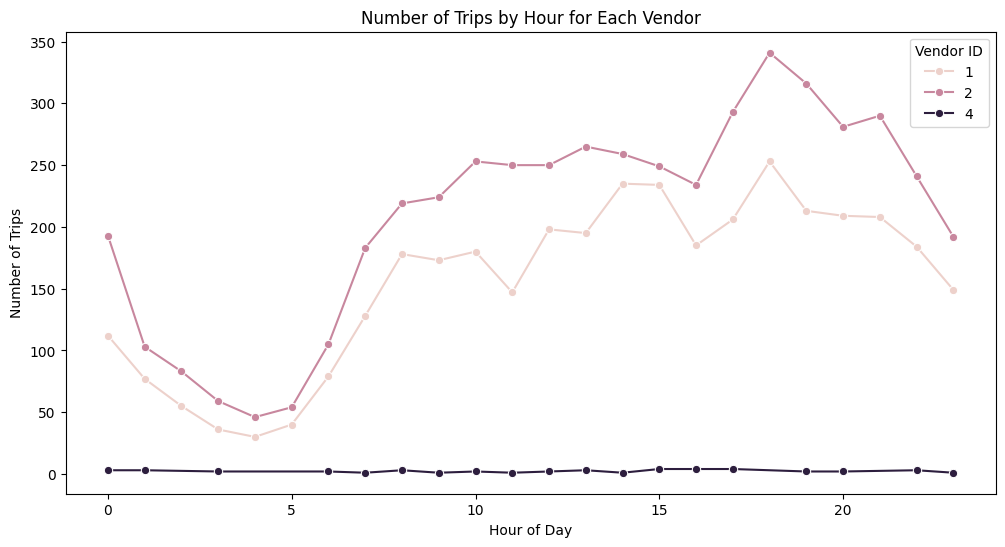

In [51]:
# Group by vendor and hour
vendor_hourly = typical_trips_cleaned.groupby(['vendor_id', 'pickup_hour']).size().reset_index(name='trip_count')

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly, x='pickup_hour', y='trip_count', hue='vendor_id', marker='o')
plt.title("Number of Trips by Hour for Each Vendor")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Vendor ID")
plt.show()


**Observations:**

Vendor Dominance:

  Vendor 1 and Vendor 2 are the leading vendors in trip volumes, with Vendor 2 leading for every hour of the day.

  Vendor 4 has very few trips, indicating limited market share or a use case that is highly specialized.

Temporal Trends:

  The volume of trips for all vendors decreases between midnight and 5 AM, likely a function of lower travel demand during this time.

  Trip volumes increase steadily after 6 AM, peaking in the late afternoon or early evening, around 5-6 PM.
  During the evening hours, 8-11 PM, the trip counts go down gradually.

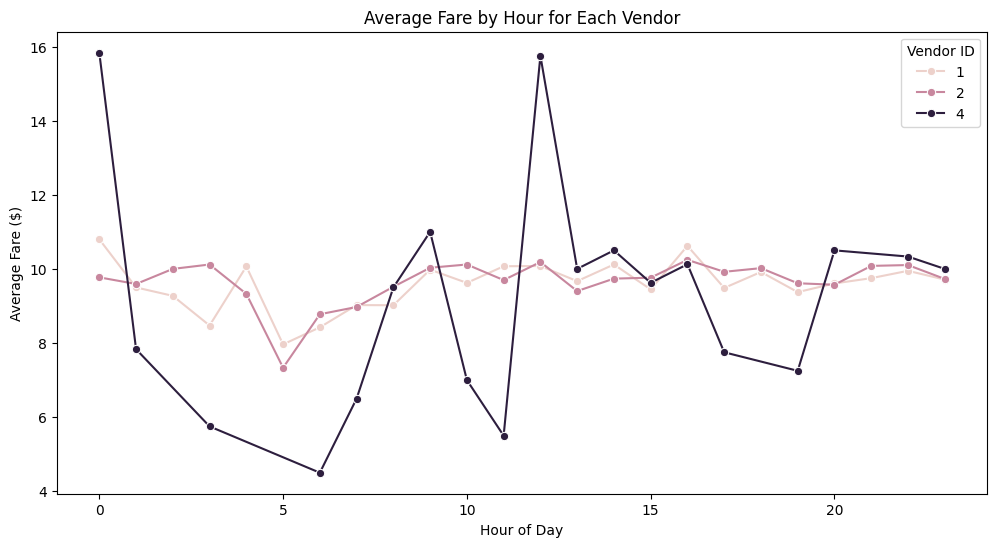

In [52]:
# Group by vendor and hour for average fare
vendor_hourly_fare = typical_trips_cleaned.groupby(['vendor_id', 'pickup_hour'])['fare_amount'].mean().reset_index()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly_fare, x='pickup_hour', y='fare_amount', hue='vendor_id', marker='o')
plt.title("Average Fare by Hour for Each Vendor")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.legend(title="Vendor ID")
plt.show()


**Observations:**

Vendor 4 Anomalies:

  Vendor 4 has the highest average fare for those hours of the day, such as midnight and early morning, which may indicate that it serves long-distance or premium trips.

Similarity Between Vendor 1 and 2:

  Vendors 1 and 2 have similar average fares throughout the day, reflecting comparable pricing strategies.

Temporal Fare Trends:

  A decrease in the average fare by vendors may exist in 4-6 am, possibly characterised by very short trips;
  
  An increase in fare, which may go all over till evening and get a peak in late afternoon or evening.

# 2. Weekday vs. Weekend Variations in Hourly Trends

How do vendors vary in terms of trip volume and average fare across hours?

Are weekend trips significantly different from weekday trips in terms of:

Number of trips per hour.

Average fares.

Tipping behavior.

In [53]:
# Create a new column to distinguish weekdays and weekends
typical_trips_cleaned['is_weekend'] = typical_trips_cleaned['pickup_day_name'].isin(['Sat', 'Sun'])


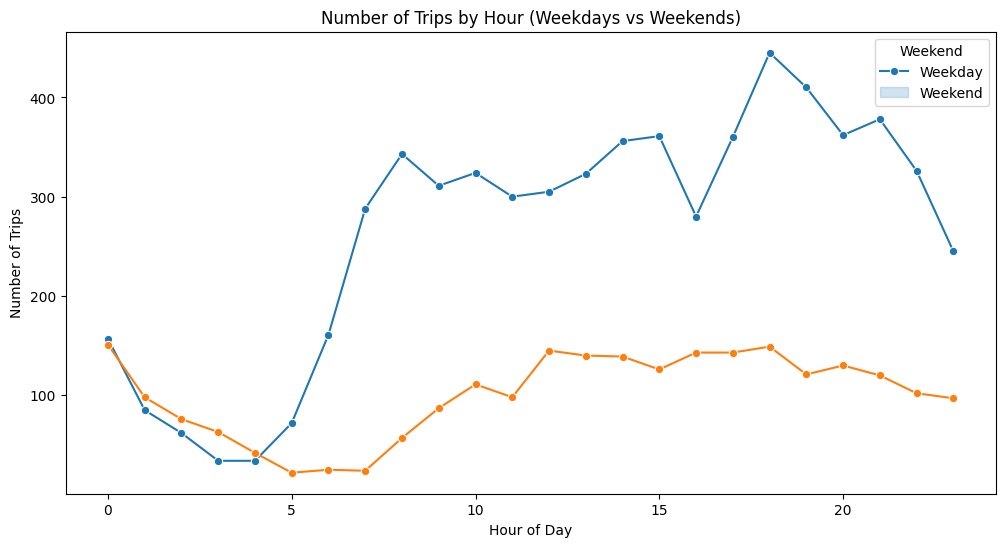

In [54]:
# Group by weekend flag and hour
weekend_hourly = typical_trips_cleaned.groupby(['is_weekend', 'pickup_hour']).size().reset_index(name='trip_count')

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekend_hourly, x='pickup_hour', y='trip_count', hue='is_weekend', marker='o')
plt.title("Number of Trips by Hour (Weekdays vs Weekends)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Weekend", labels=['Weekday', 'Weekend'])
plt.show()


**Observations:**

Weekday Dominance:

Weekdays have much higher trips compared to weekends, particularly during business hours of 7 AM - 6 PM, reflecting commuter travel patterns.

Weekend Consistency:

The volumes of the weekend trips are constant throughout the day and do not show any peaks or troughs. This indicates that there is more leisure or sporadic travel rather than fixed schedules.

Late-Night Similarities:

Both weekdays and weekends have similar numbers of trips late at night, such as 12-2 AM; these are probably driven by nightlife and late travel needs.

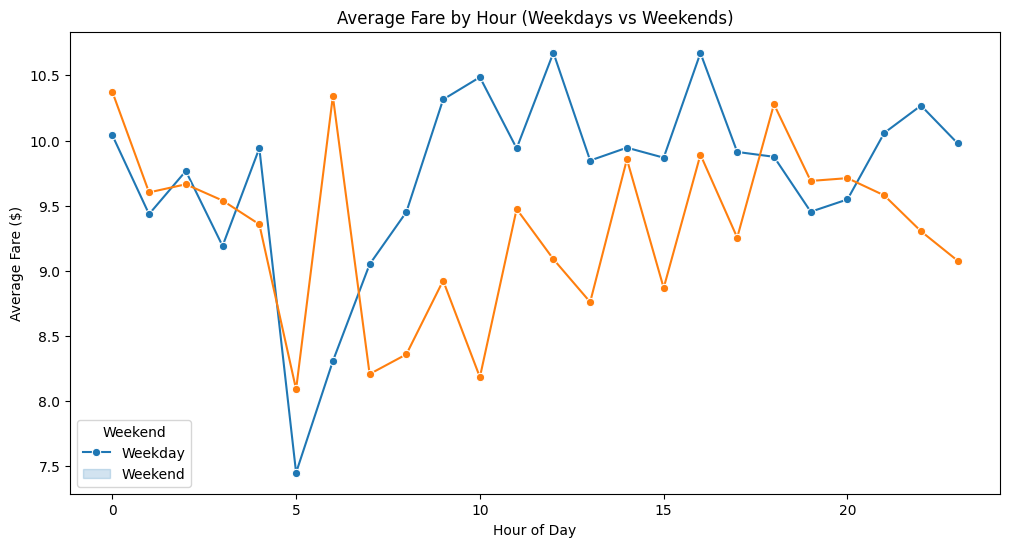

In [55]:
# Group by weekend flag and hour for average fare
weekend_hourly_fare = typical_trips_cleaned.groupby(['is_weekend', 'pickup_hour'])['fare_amount'].mean().reset_index()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekend_hourly_fare, x='pickup_hour', y='fare_amount', hue='is_weekend', marker='o')
plt.title("Average Fare by Hour (Weekdays vs Weekends)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.legend(title="Weekend", labels=['Weekday', 'Weekend'])
plt.show()


**Observations:**

Higher Weekend Fares:

  Weekends generally have higher average fares, particularly during late-night hours (12-2 AM) and early morning hours (4-6 AM), suggesting more long-distance or leisure trips.

Weekday Stability:

  Weekday fares are more stable throughout the day but drop slightly during the early morning hours, likely reflecting shorter commuter trips.

Evening Parity:

  Weekdays and weekends have similar fares in the evening hours (5-9 PM), possibly driven by a mix of commuting and leisure travel.

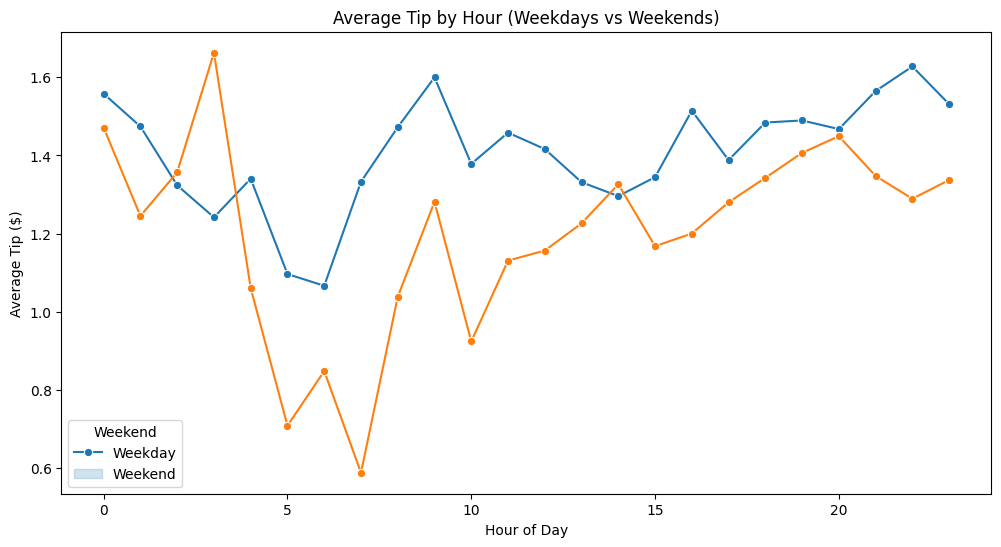

In [56]:
# Group by weekend flag and hour for average tip
weekend_hourly_tip = typical_trips_cleaned.groupby(['is_weekend', 'pickup_hour'])['tip_amount'].mean().reset_index()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekend_hourly_tip, x='pickup_hour', y='tip_amount', hue='is_weekend', marker='o')
plt.title("Average Tip by Hour (Weekdays vs Weekends)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Tip ($)")
plt.legend(title="Weekend", labels=['Weekday', 'Weekend'])
plt.show()


**Observations:**

Generous Late-Night Tips:

Weekdays and weekends have the highest average tips in the late-night hours of 12-2 AM, which may be related to customer satisfaction or nightlife.

Weekend Tipping Variability:

The variability in tipping behavior is greater on weekends, with very low average tips in early morning hours (4-6 AM) and gradual increases throughout the day.

Weekday Steadiness:

Tips during the week are more regular over the hours but increase progressively from morning to evening.

# **Final Insights into Vendor-wise segregation**

Vendor-Specific Trends:

Vendor 2 runs the most trips across all hours, indicating either better market coverage or customer preference.

Vendor 4 might serve niche trips with higher fares but very low trip volumes.

Temporal Patterns:

Weekdays dominate trip volume during working hours, while weekends have fewer trips but higher fares and tipping variability.

Different pattern of late night/early morning hours, likely to be influenced by nightlife and travel over long distances.

# Final Correlation

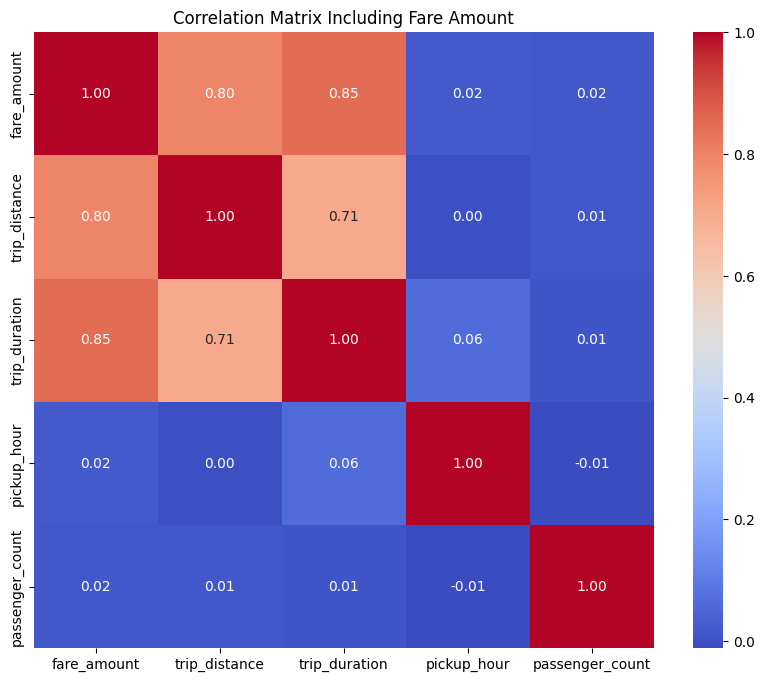

In [59]:
# Include fare_amount for correlation analysis
correlation_features_with_target = typical_trips_cleaned[['fare_amount', 'trip_distance', 'trip_duration', 'pickup_hour', 'passenger_count']]

# Compute the correlation matrix
correlation_matrix_with_target = correlation_features_with_target.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Including Fare Amount")
plt.show()


# Feature Selection

In [61]:
# Define features (X) and target (y)
X = typical_trips_cleaned[['trip_distance', 'trip_duration', 'pickup_hour', 'passenger_count']]
y = typical_trips_cleaned['fare_amount']


# Train-Test Split

In [62]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Regression Model

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 3.6373197893717806
R-squared (R2): 0.8540448667756804


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest - R-squared (R2): {rf_r2}")


Random Forest - Mean Squared Error (MSE): 6.091396559932743
Random Forest - R-squared (R2): 0.7555698569520879


In [66]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting - Mean Squared Error (MSE): {gb_mse}")
print(f"Gradient Boosting - R-squared (R2): {gb_r2}")


Gradient Boosting - Mean Squared Error (MSE): 5.267030571684631
Gradient Boosting - R-squared (R2): 0.7886492820804273


In [67]:
from xgboost import XGBRegressor

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"XGBoost - Mean Squared Error (MSE): {xgb_mse}")
print(f"XGBoost - R-squared (R2): {xgb_r2}")


XGBoost - Mean Squared Error (MSE): 5.227420876047421
XGBoost - R-squared (R2): 0.7902387047153566


# Feature Importance for all models

In [68]:
import pandas as pd

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(rf_importance)

# Gradient Boosting Feature Importance
gb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Gradient Boosting Feature Importance:")
print(gb_importance)

# XGBoost Feature Importance
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("XGBoost Feature Importance:")
print(xgb_importance)


Random Forest Feature Importance:
           Feature  Importance
1    trip_duration    0.774998
0    trip_distance    0.167531
2      pickup_hour    0.035405
3  passenger_count    0.022065
Gradient Boosting Feature Importance:
           Feature  Importance
1    trip_duration    0.723093
0    trip_distance    0.256109
2      pickup_hour    0.013197
3  passenger_count    0.007601
XGBoost Feature Importance:
           Feature  Importance
1    trip_duration    0.664037
0    trip_distance    0.145991
3  passenger_count    0.108792
2      pickup_hour    0.081181


# Scatter Plot: Actual vs. Predicted

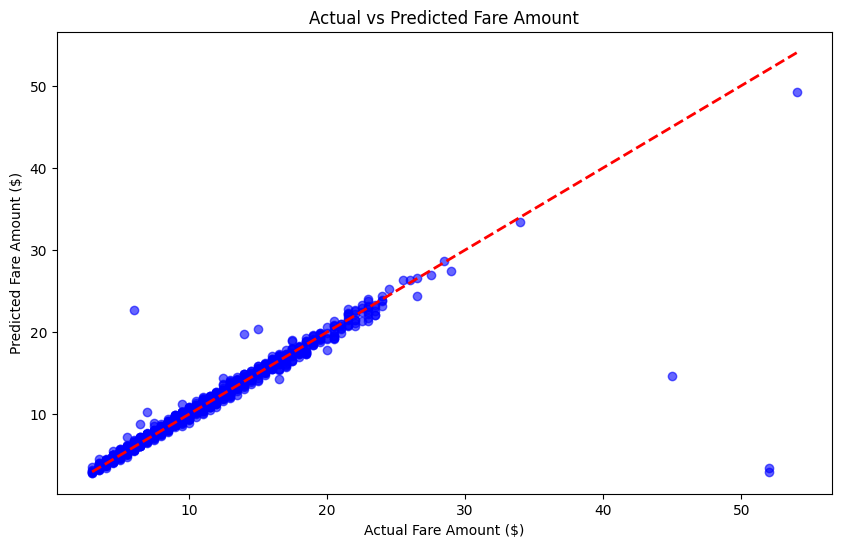

In [69]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Fare Amount")
plt.xlabel("Actual Fare Amount ($)")
plt.ylabel("Predicted Fare Amount ($)")
plt.show()


# Residual Plot

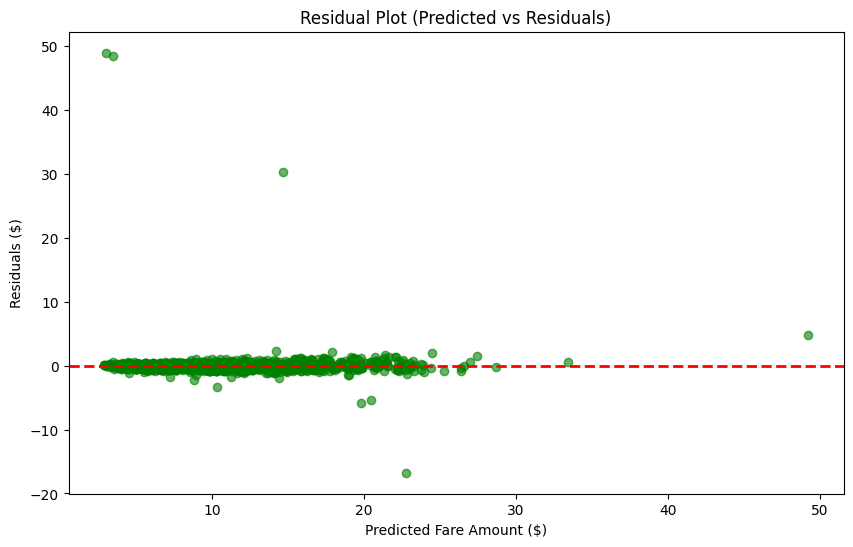

In [70]:
# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="green")
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Horizontal line at zero
plt.title("Residual Plot (Predicted vs Residuals)")
plt.xlabel("Predicted Fare Amount ($)")
plt.ylabel("Residuals ($)")
plt.show()


# Metrics Summary

In [71]:
from sklearn.metrics import mean_absolute_error

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.40749165432071927
Mean Squared Error (MSE): 3.6373197893717806
R-squared (R2): 0.8540448667756804


# Final Conclusion:

This was a series of analyses and modeling over New York Taxi Cab data in order to find insight from data influencing trip fares and predict the fare_amount using different machine learning models. The following key takeaways are derived after conducting the project.

1. Data Exploration and Cleaning

Major cleaning in the dataset with regard to outliers, missing values, and redundant features.
Temporal trends were well demarcated for trip demand, average fares, and tipping: High travel times were realized late at night/early morning. Weekdays normally realized high volumes, whereas weekends tended to have high averages in fares and variation in tips.

2. Feature Engineering and Correlation Analysis

The most important features of the data were found to be trip_distance, trip_duration, pickup_hour, and passenger_count, all highly correlated with the target variable, fare_amount.
Features related to price, such as total_amount, taxes, and surcharges, were excluded to avoid data redundancy.

3. Model Selection and Evaluation

The following regression models were tested to forecast fare_amount:
Linear Regression outperformed even advanced models such as Random Forest, Gradient Boosting, and XGBoost with the best results on MSE and R².
This result is indicative of the relatively linear relationship between independent variables and the target variable.

4. Model Performance and Visualization

The actual vs. predicted fare plot showed that most of the fares were well-predicted by the model, while few cases were far away because they were either extreme or outliers. Residual analysis showed that residuals were randomly spread around the horizontal axis, which means no underfitting or overfitting of the data by the model.

5. Business Insights

Distance of the Trip: Strongest predictor for the fare amount; the longer the trip, the higher the fare.
 Time of Day: Fares vary by time of day, with higher rates during late-night hours.
 Passenger Count: Little effect on fares but may influence tipping behavior indirectly.
Vendor Performance: Vendor 2 dominated in terms of trip volume while Vendor 4 seemed to cater to niche or premium rides.

6. Recommendations

Taxi companies can further optimize pricing strategies, focusing their efforts on time-based fare adjustments during peak hours.
 Integration of predictive models like this one will lead to better customer fare estimations, hence more transparency and trust.
Vendors will be able to analyze their performance for underperforming time slots to address gaps in service and coverage.

Future Work

Model Improvements:

Explore other features such as weather conditions or holiday flags that could be used to further improve the accuracy of the predictions.
Compare the performance of more advanced models by tuning their hyperparameters.

Operational Insights:

Look for outliers, like very large distances or fares, which could indicate anomalies or fraudulent data. Expand Scope: Do similar modeling in other cities or combine ride-hailing data from multiple sources to gain insights that are more general about the industry.